In [4]:
%%capture
import logging
from pathlib import Path

if Path.cwd().stem == "notebooks":
    %cd ..
    %load_ext autoreload
    %autoreload 2


In [35]:
import os
from pathlib import Path

import holoviews as hv
import hvplot.polars  # noqa
import matplotlib.pyplot as plt
import numpy as np
import polars as pl
import tomllib
from dotenv import load_dotenv
from polars import col

from src.experiments.measurement.stimulus_generator import StimulusGenerator
from src.features.utils import to_describe
from src.log_config import configure_logging
from src.plots.plot_stimulus import (
    plot_stimulus,
    plot_stimulus_labels,
    plot_stimulus_matplotlib,
    plot_stimulus_with_labels,
)

load_dotenv()
FIGURE_DIR = Path(os.getenv("FIGURE_DIR"))

configure_logging(
    stream_level=logging.DEBUG,
    ignore_libs=["numexpr", "numba", "bokeh", "matplotlib", "tornado", "Comm"],
)

pl.Config.set_tbl_rows(12)  # for the 12 trials
hv.output(widget_location="bottom", size=130)

In [6]:
def load_configuration(file_path: str) -> dict:
    """Load configuration from a TOML file."""
    file_path = Path(file_path)
    with open(file_path, "rb") as file:
        return tomllib.load(file)


config = load_configuration("src/experiments/measurement/measurement_config.toml")[
    "stimulus"
]


In [7]:
config = {
    "seeds": config["seeds"],
    "sample_rate": config["sample_rate"],
    "half_cycle_num": config["half_cycle_num"],
    "period_range": config["period_range"],
    "amplitude_range": config["amplitude_range"],
    "inflection_point_range": config["inflection_point_range"],
    "shorten_expected_duration": config["shorten_expected_duration"],
    "major_decreasing_half_cycle_num": config["major_decreasing_half_cycle_num"],
    "major_decreasing_half_cycle_period": config["major_decreasing_half_cycle_period"],
    "major_decreasing_half_cycle_amplitude": config[
        "major_decreasing_half_cycle_amplitude"
    ],
    "major_decreasing_half_cycle_min_y_intercept": config[
        "major_decreasing_half_cycle_min_y_intercept"
    ],
    "plateau_num": config["plateau_num"],
    "plateau_duration": config["plateau_duration"],
    "plateau_percentile_range": config["plateau_percentile_range"],
    "prolonged_minima_num": config["prolonged_minima_num"],
    "prolonged_minima_duration": config["prolonged_minima_duration"],
}
assert len(config["seeds"]) == len(set(config["seeds"])), "Seeds must be unique"
assert len(config["seeds"]) == 12, "There must be 12 seeds"

dummy_participant = {
    "temperature_baseline": 47.0,
    "temperature_range": 1.5,  # VAS 0 - VAS 70
}


dummy_config = {
    "seeds": [1, 2, 3],
    "half_cycle_num": 2,
    "period_range": [2, 2],
    "major_decreasing_half_cycle_num": 0,
    "shorten_expected_duration": 0,
    "amplitude_range": [0.9, 1.0],
    "plateau_num": 0,
    "prolonged_minima_num": 0,
}

# Plot one random seed
config.update(dummy_participant)
seed = np.random.randint(0, 1000)
stimulus = StimulusGenerator(config, debug=0, seed=467)

# print("Plot one random seed:")
plot_stimulus(stimulus, highlight_decreasing=True)

figure(id='290d2487-d42a-4a6d-a9e9-335b28790292', ...)

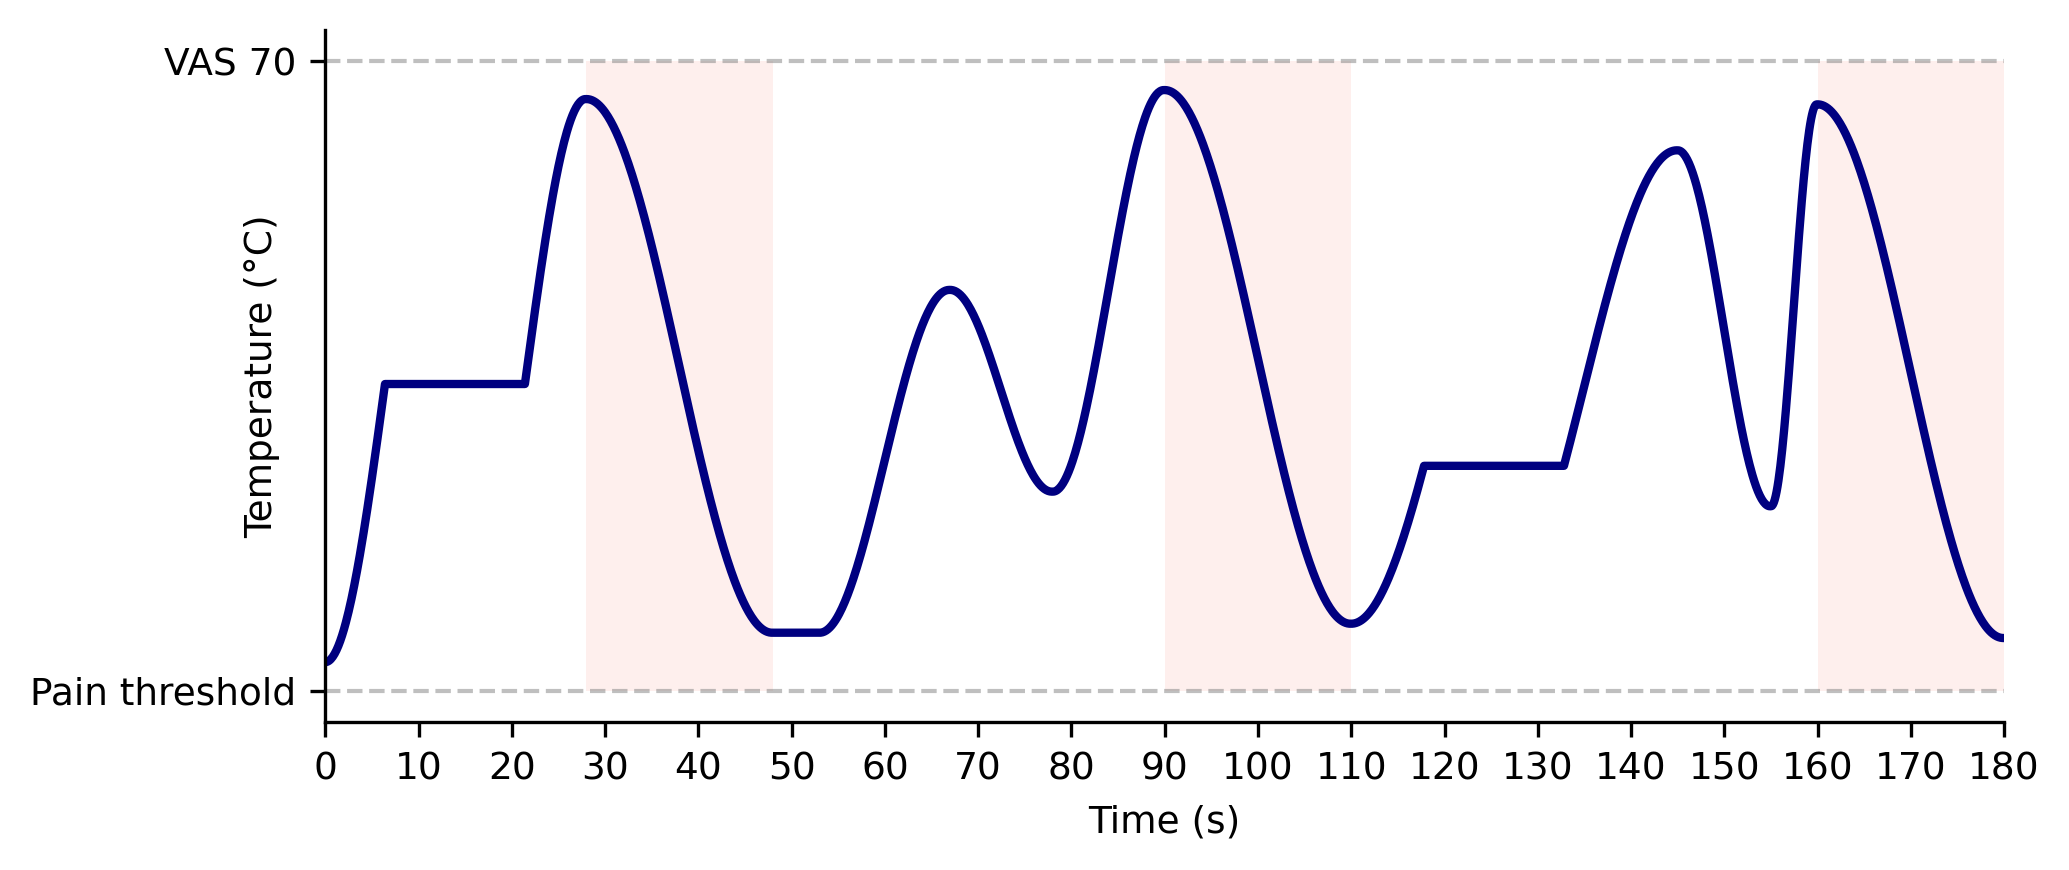

In [8]:
fig = plot_stimulus_matplotlib(stimulus, show_arrows=0)

In [9]:
# save figure
fig[0].savefig(FIGURE_DIR / "stimulus_example.png", dpi=300)

In [10]:
stimuli = pl.concat(
    [
        pl.DataFrame(
            {
                "y": StimulusGenerator(config, seed).y,
                "time": np.arange(len(StimulusGenerator(config, seed).y)),
                "seed": np.array([seed] * len(StimulusGenerator(config, seed).y)),
            }
        )
        for seed in config["seeds"]
    ]
)
stimuli.group_by("seed", maintain_order=True).agg(to_describe("y"))

seed,y_count,y_null_count,y_mean,y_std,y_min,y_25%,y_50%,y_75%,y_max
i64,u32,u32,f64,f64,f64,f64,f64,f64,f64
133,1800,0,46.923677,0.421417,46.25,46.665601,46.77629,47.232711,47.746504
243,1800,0,46.936088,0.417877,46.25,46.628212,46.89741,47.273344,47.738635
265,1800,0,46.933886,0.440374,46.25,46.596208,46.779867,47.291213,47.744373
396,1800,0,46.970278,0.413692,46.25,46.728107,46.936483,47.308829,47.731835
467,1800,0,46.967071,0.419495,46.25,46.685108,46.972487,47.291938,47.737302
658,1800,0,46.96046,0.41285,46.25,46.621278,46.966524,47.264738,47.704574
681,1800,0,46.932364,0.407685,46.25,46.647874,46.942859,47.242448,47.739538
743,1800,0,46.963318,0.410683,46.25,46.715073,46.884511,47.289045,47.738548
806,1800,0,46.901926,0.438545,46.25,46.566414,46.72672,47.242545,47.749272


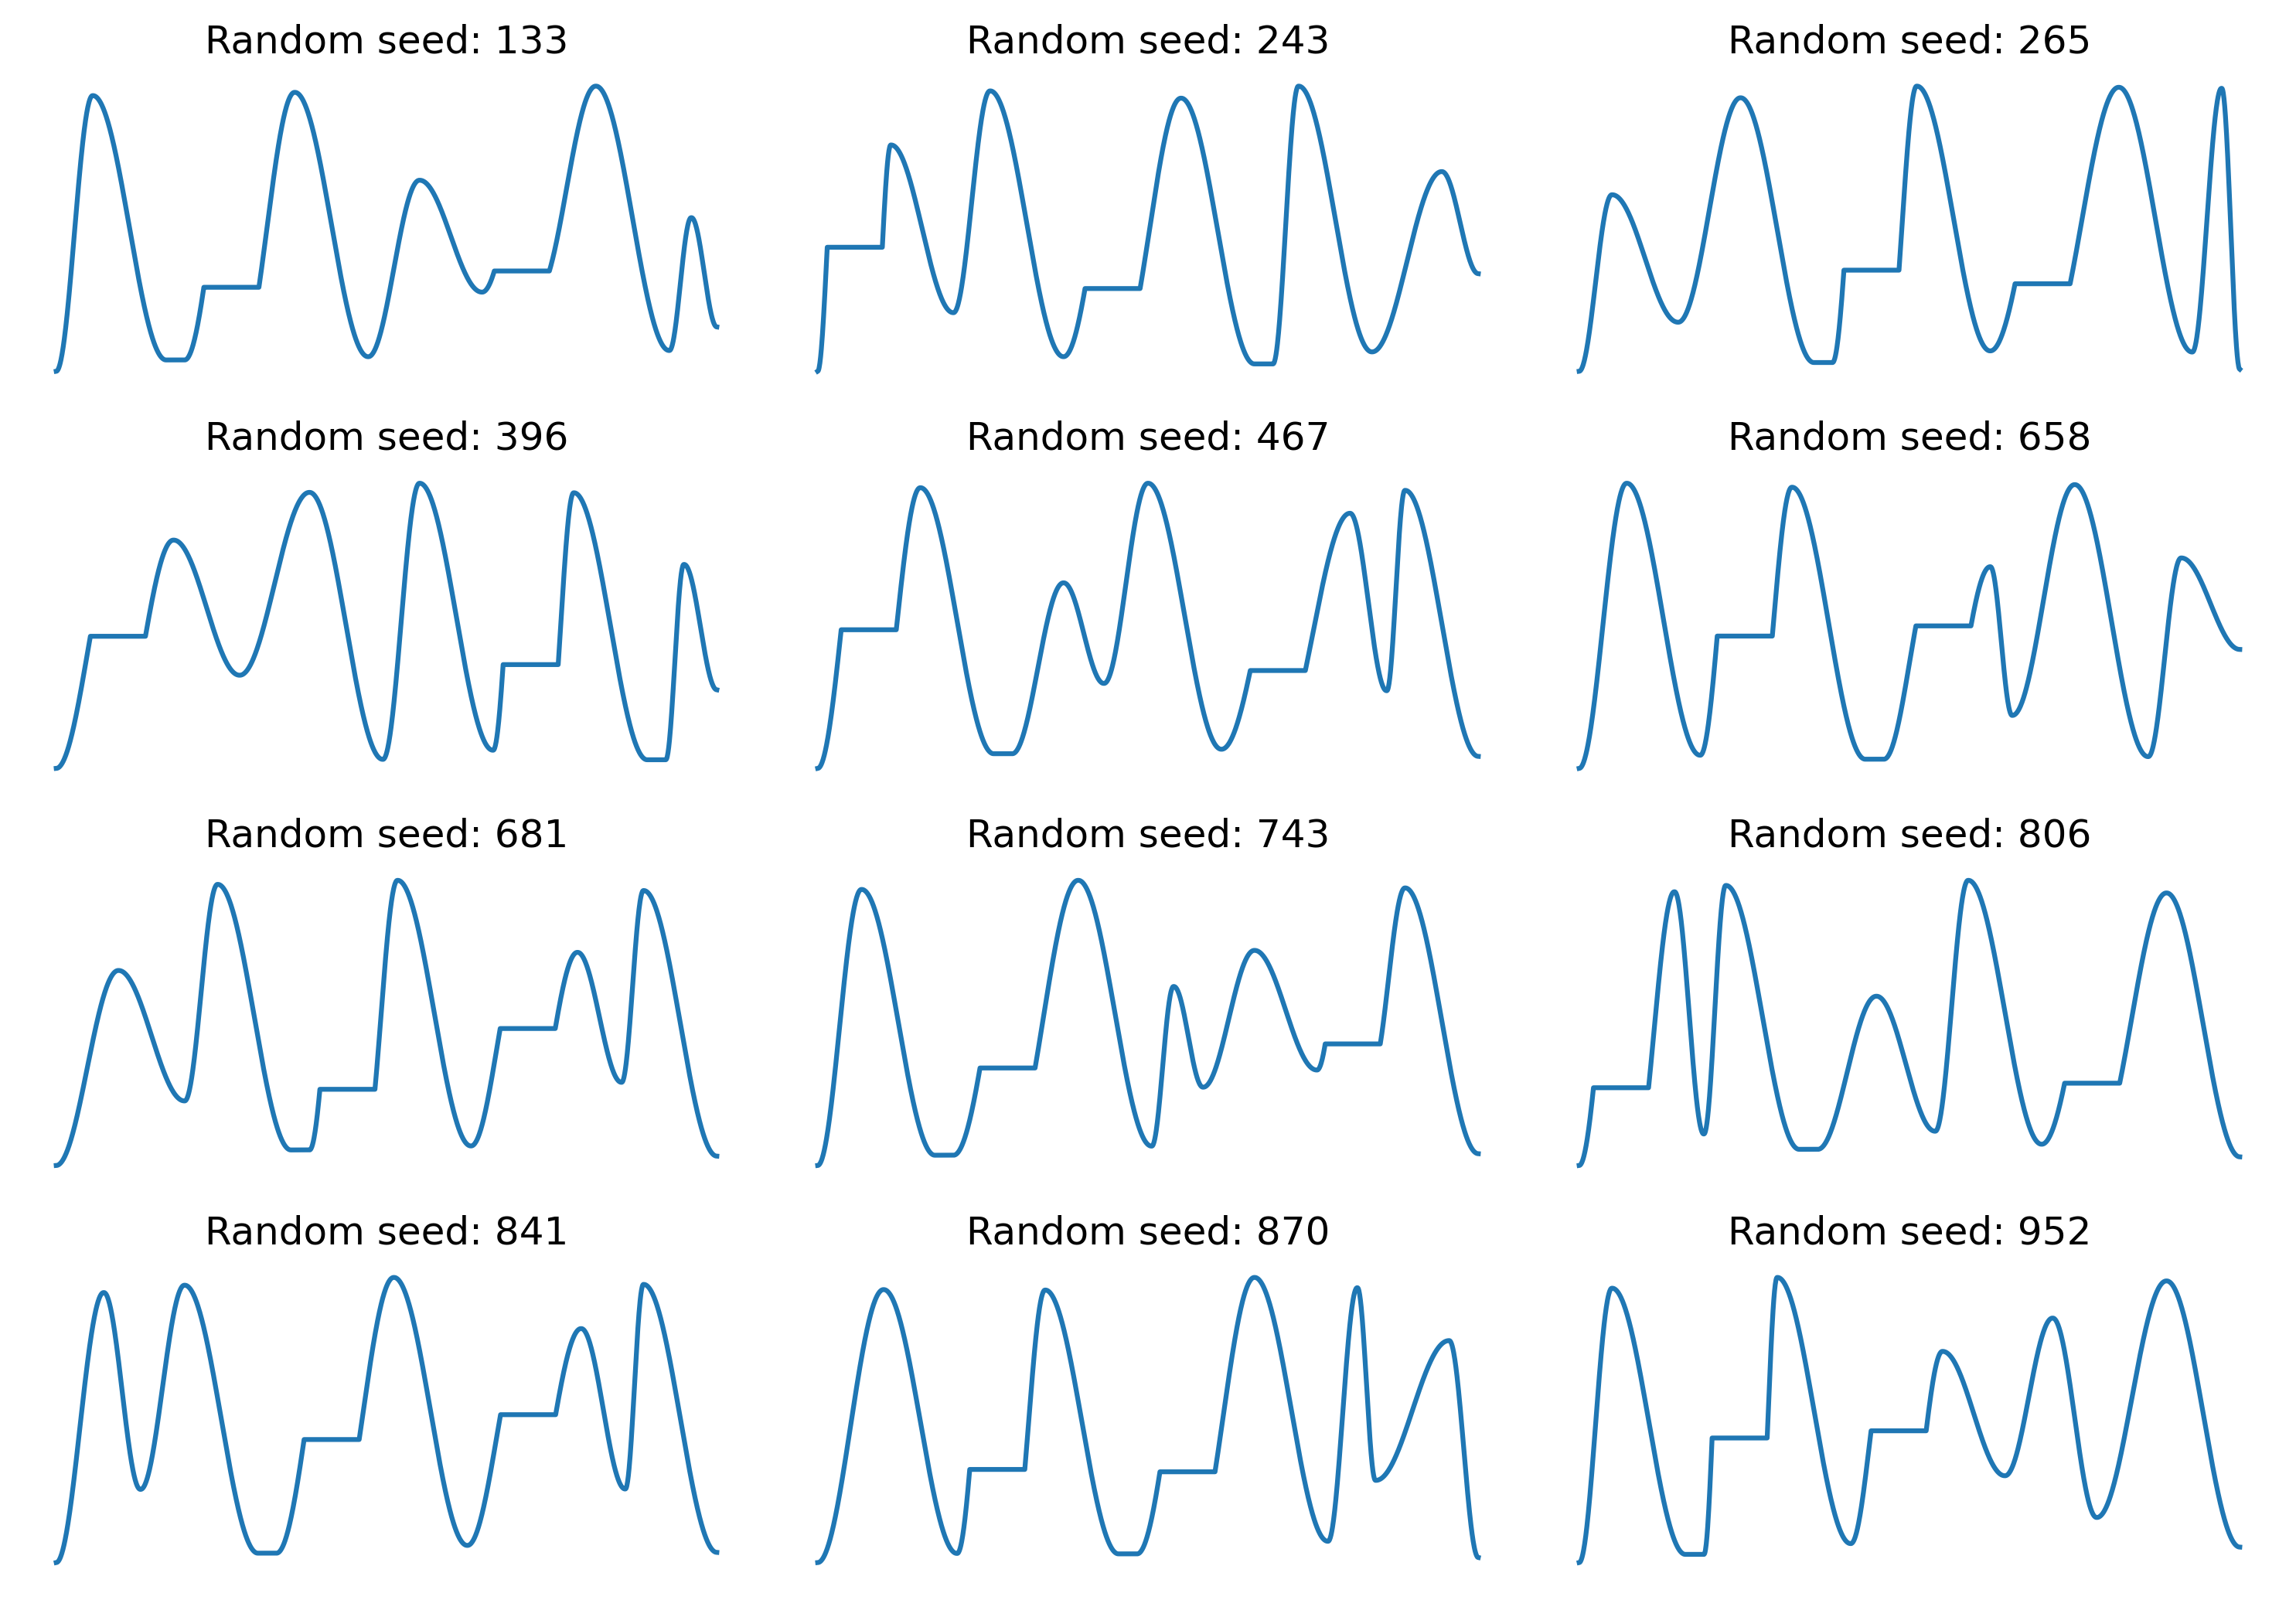

In [11]:
rows, cols = 4, 3
fig, axes = plt.subplots(rows, cols, figsize=(10, 7))
axes = axes.flatten()

grouped = stimuli.group_by("seed", maintain_order=True).agg(col("time"), col("y"))
for i, row in enumerate(grouped.to_dicts()):
    ax = axes[i]
    ax.plot(row["time"], row["y"])
    ax.set_title(f"Random seed: {row['seed']}")
    ax.axis(False)

plt.tight_layout()
plt.show()
fig.savefig(FIGURE_DIR / "stimulus_seeds.png", dpi=300)


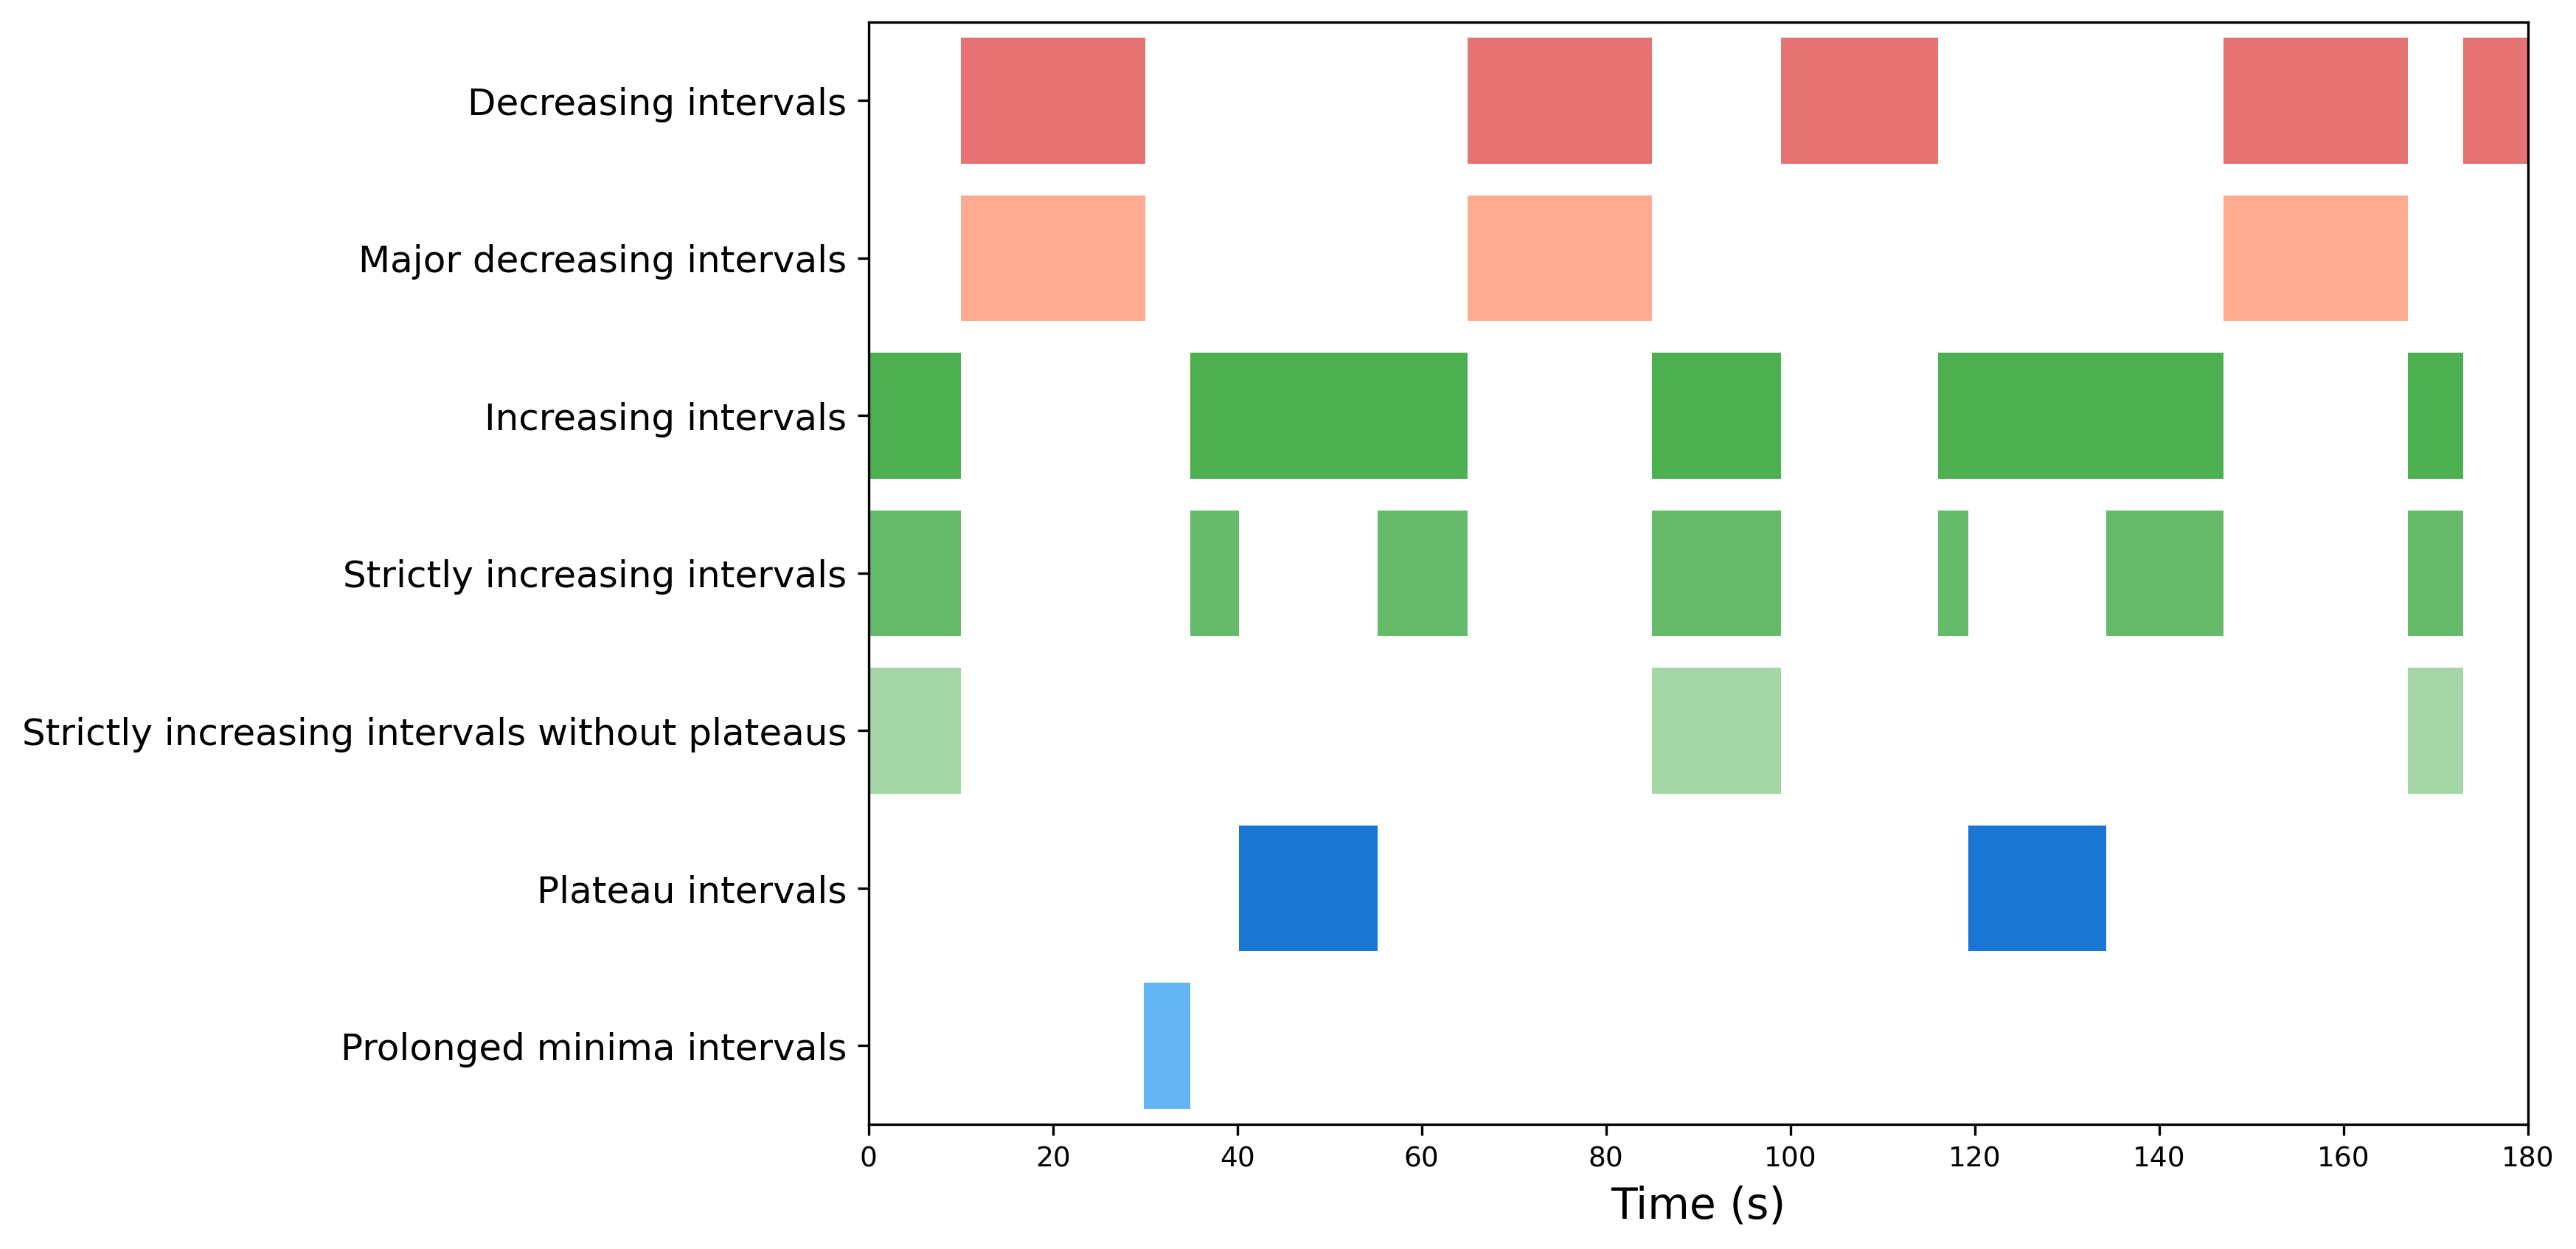

In [12]:
stimulus = StimulusGenerator(config, seed=133)
plot = plot_stimulus_labels(stimulus)

In [13]:
plot.savefig(
    FIGURE_DIR / "stimulus_labels.png", dpi=300, bbox_inches="tight", pad_inches=0.2
)

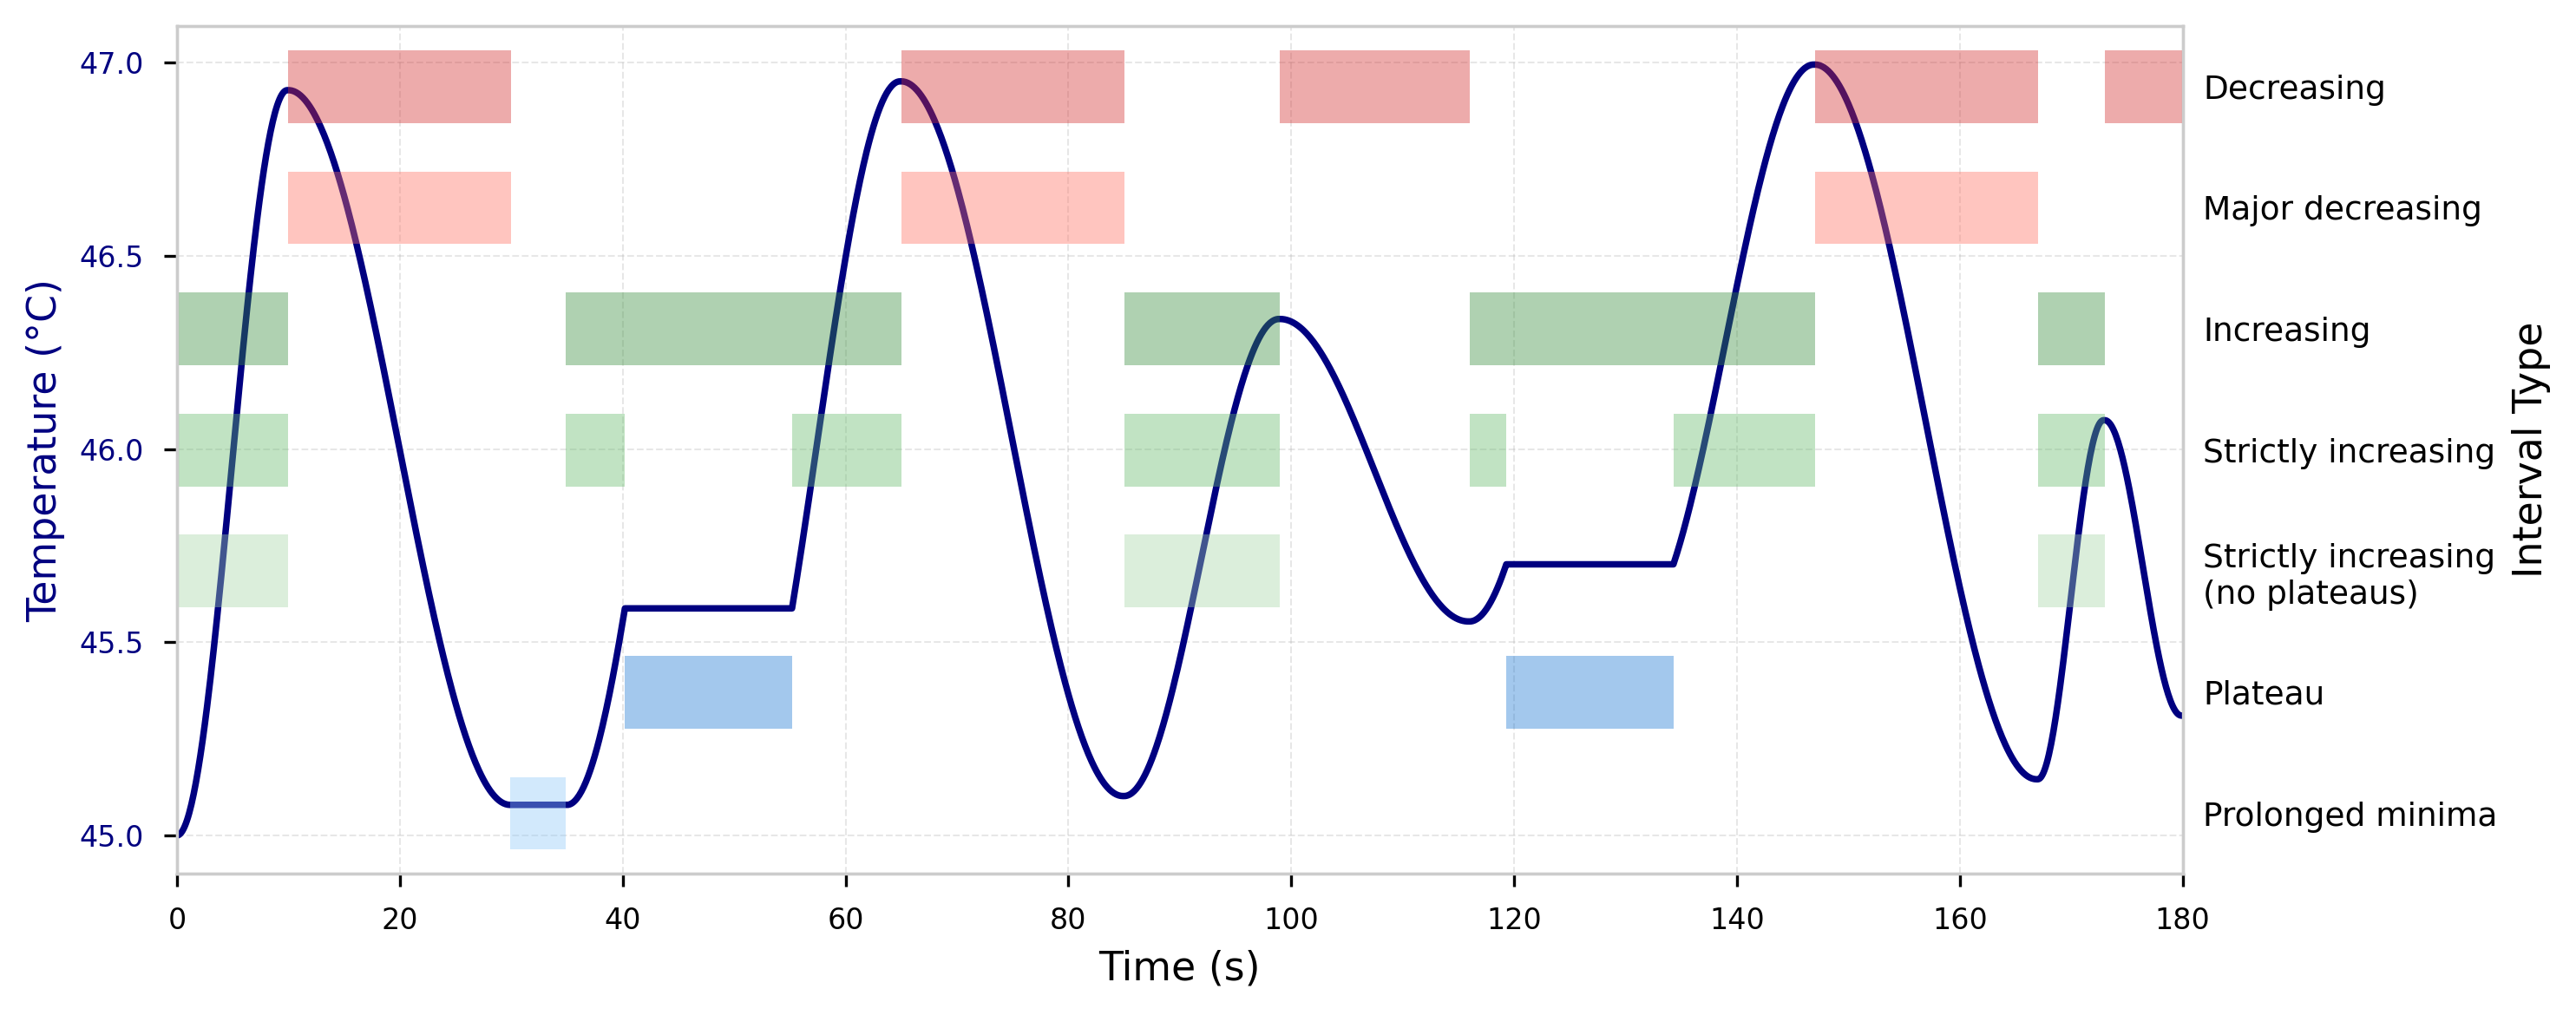

(<Figure size 3000x1200 with 2 Axes>,
 <Axes: xlabel='Time (s)', ylabel='Temperature (°C)'>,
 <Axes: ylabel='Interval Type'>)

In [ ]:
dummy_participant = {
    "temperature_baseline": 46.0,
    "temperature_range": 2,  # VAS 0 - VAS 70
}
config.update(dummy_participant)


stimulus = StimulusGenerator(config, seed=133)

plot_stimulus_with_labels(stimulus)

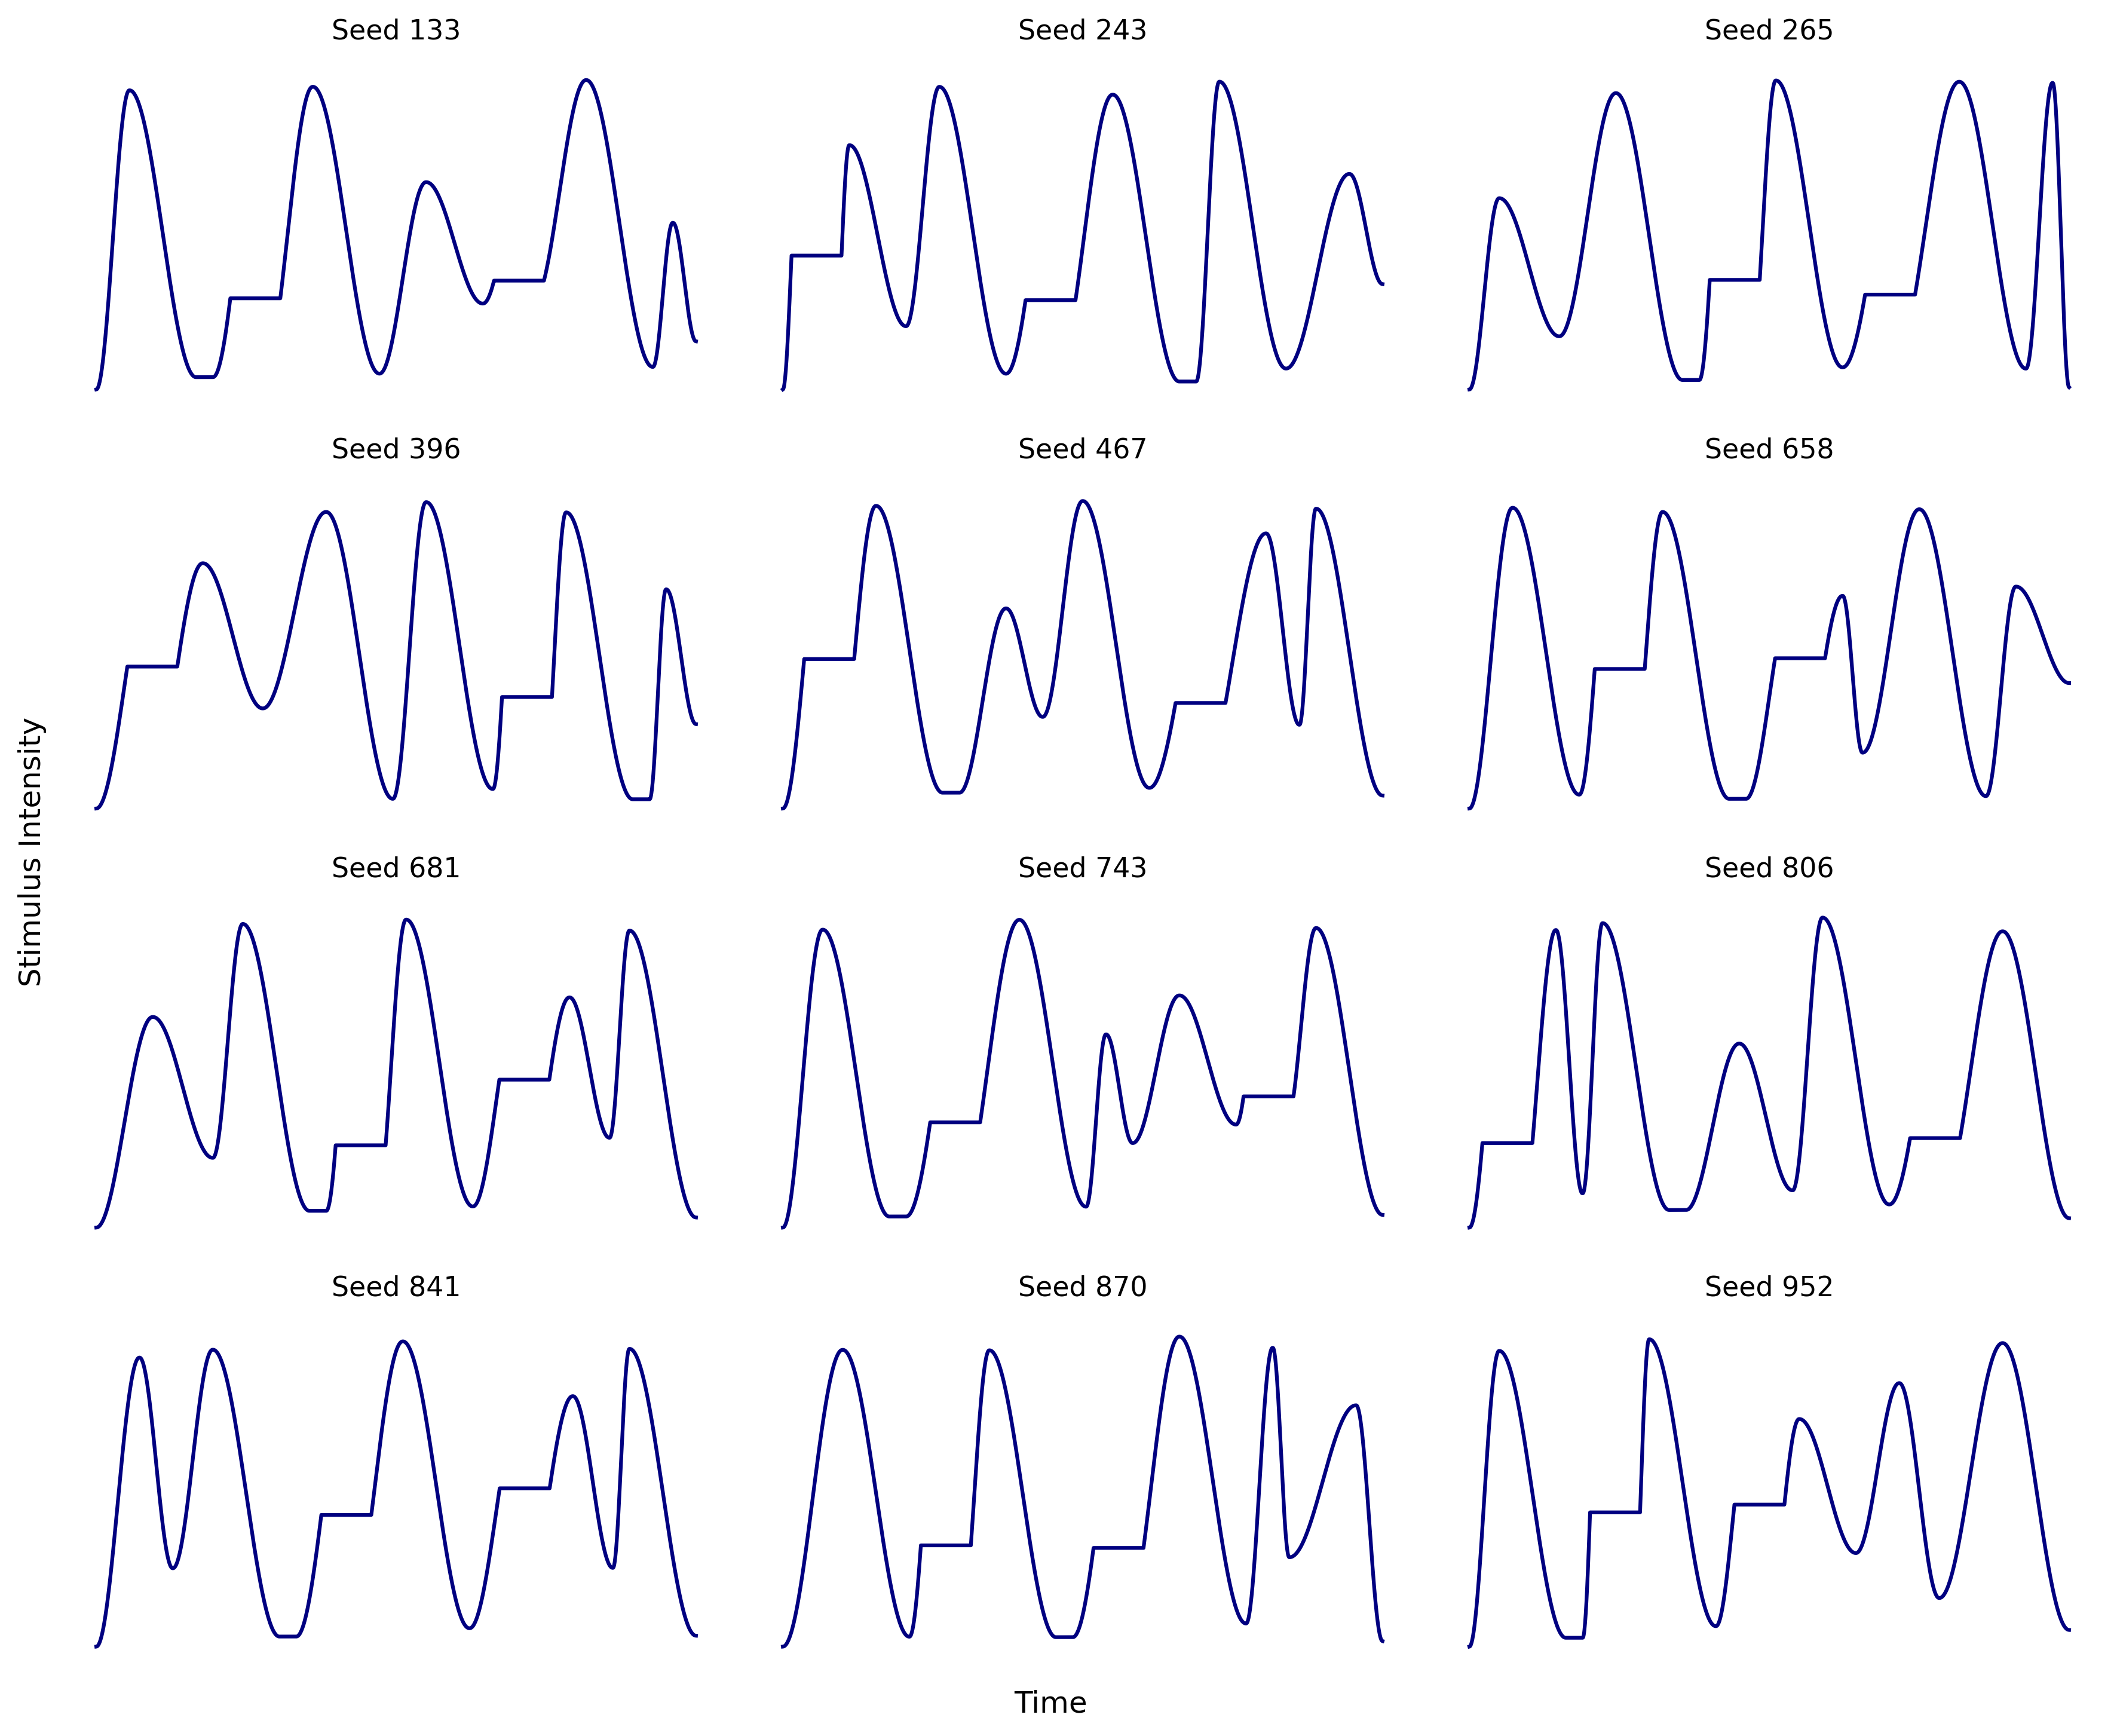

In [ ]:
rows, cols = 4, 3
fig, axes = plt.subplots(rows, cols, figsize=(12, 10))
axes = axes.flatten()

grouped = stimuli.group_by("seed", maintain_order=True).agg(col("time"), col("y"))

for i, row in enumerate(grouped.to_dicts()):
    ax = axes[i]
    ax.plot(row["time"], row["y"], linewidth=1.5, color="#000080")
    ax.set_title(f"Seed {row['seed']}", fontsize=11, fontweight="medium", pad=8)

    # Add minimal axes
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)

    # Remove ticks but keep subtle grid
    ax.set_xticks([])
    ax.set_yticks([])
    ax.grid(True, alpha=0.15, linewidth=0.5, linestyle="-")

    # Set consistent y-axis limits across all subplots
    ax.set_ylim(stimuli["y"].min() - 0.1, stimuli["y"].max() + 0.1)

# Add common axis labels
fig.text(0.5, 0.02, "Time", ha="center", fontsize=12, fontweight="medium")
fig.text(
    0.02,
    0.5,
    "Stimulus Intensity",
    va="center",
    rotation="vertical",
    fontsize=12,
    fontweight="medium",
)

plt.tight_layout(rect=[0.03, 0.03, 1, 0.98])
plt.show()